In [47]:
import pandas as pd
import os
import re
import random
import pickle
import numpy as np
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from tqdm import tqdm
from funciones_propias import load_imdb_corpus_test

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [7]:
# data url:  https://drive.google.com/file/d/1CD7s5rnLbsQ7Bgx6WrSv6QwJe6_Q7dvy/view?usp=sharing

TRAIN_PATH = "./train_corpus"
TEST_PATH = "./test_corpus"

In [3]:
def load_imdb_corpus(path):
    """ Iterates over the corpus and returns a dictionary with the id,
        rank, and raw text """

    reviews = os.listdir(path)
    random.shuffle(reviews)

    for r in reviews:
        movie, rank = r.split(".")[0].split("_")
        with open(path + "/" + r, encoding="utf-8") as f:
            raw_text = f.read()
        yield({"id": r, "rank": rank, "raw_text": raw_text}) 

In [4]:
def tokenize(raw_text):
    """ Tokenizes """

    raw_text = raw_text.replace("\'", "'")
    raw_text = raw_text.replace("<br /><br />", "\n")
    raw_text = raw_text.replace("/", " / ")
    sentences = sent_tokenize(raw_text)
    tokens = [e2 for e1 in sentences for e2 in word_tokenize(e1)]  # Nested list comprehension
    tokens = [e.lower() for e in tokens if re.compile("[A-Za-z]").search(e[0])]

    return(tokens)

In [8]:
imdb_tr = load_imdb_corpus(TRAIN_PATH)

In [9]:
print(next(imdb_tr))

{'id': '11657_4.txt', 'rank': '4', 'raw_text': '"Scary Movie 2" is a let down to the Scary Movie Franchise. Scary Movie 1, 3 and 4 were all good but this one was kind of boring and not very funny. Luckily they picked their act up after this one and made two more great Scary Movies.<br /><br />This film is about a group of teens who get tricked by their Professor into going to a haunted mansion for a night. Things start to go wrong and then they realize they have to escape.<br /><br />This movie isn\'t horrible but they could have improved quite a few things. It is a bit of fun and if you liked the other movies in the Scary Movie franchise then give this a watch - but I don\'t think you will like it nearly as much.'}


In [10]:
print(next(imdb_tr))

{'id': '6296_7.txt', 'rank': '7', 'raw_text': 'Parker (Johnathan Schaech) is an aspiring writer who is still looking for his big break. In the meantime, he works as a telephone adviser for a Manhattan psychic hotline. One day, most unfortunately, his apartment building burns down. Parker and his cat make it out alive but are now stuck with the arduous task of finding affordable housing in the Big Apple. Word comes to Parker that a lady, Samantha (Alison Eastwood) is searching for a roommate but will only accept a gay male. Since Parker is straight but the price is right, he decides to pretend that he is gay. Samantha likes him from the start and welcomes him as her new cohabitant. But, poor Parker. Sam is lovely, intelligent and very desirable. How will he be able to keep his true nature under control? Besides, doesn\'t Sam have a successful businessman-boyfriend anyway? This is a sweet, likable, and humorous film with two very attractive stars in Eastwood and Schaech. Naturally, the p

In [11]:
review = next(imdb_tr)

In [12]:
print(review)

{'id': '5697_8.txt', 'rank': '8', 'raw_text': "May 2004, Wonderland is fairly new in the UK. Brilliant film of a brutal true story. If you know LA from the early 80's, you will appreciate how well it is captured. The use of the elements which make up its gritty cinematic style is original, amplifying the experience and bringing the viewer very close to actually being there. The use of a disjointed 'Pulp Fiction' style time line allows exploration of the uncertainty concerning what really happened, while the direction and performances of the cast command attention, especially Val Kilmer as John Holmes; an Oscar for sure if I were handing them out."}


In [17]:
tokens = tokenize(review["raw_text"])

In [18]:
print(tokens)

['may', 'wonderland', 'is', 'fairly', 'new', 'in', 'the', 'uk', 'brilliant', 'film', 'of', 'a', 'brutal', 'true', 'story', 'if', 'you', 'know', 'la', 'from', 'the', 'early', 'you', 'will', 'appreciate', 'how', 'well', 'it', 'is', 'captured', 'the', 'use', 'of', 'the', 'elements', 'which', 'make', 'up', 'its', 'gritty', 'cinematic', 'style', 'is', 'original', 'amplifying', 'the', 'experience', 'and', 'bringing', 'the', 'viewer', 'very', 'close', 'to', 'actually', 'being', 'there', 'the', 'use', 'of', 'a', 'disjointed', 'fiction', 'style', 'time', 'line', 'allows', 'exploration', 'of', 'the', 'uncertainty', 'concerning', 'what', 'really', 'happened', 'while', 'the', 'direction', 'and', 'performances', 'of', 'the', 'cast', 'command', 'attention', 'especially', 'val', 'kilmer', 'as', 'john', 'holmes', 'an', 'oscar', 'for', 'sure', 'if', 'i', 'were', 'handing', 'them', 'out']


In [19]:
print(tokens[0])

may


In [20]:
print(tokens[1])

wonderland


In [21]:
def text_to_bow(tokens):
    return(Counter(tokens))

In [22]:
print(text_to_bow(tokens))

Counter({'the': 10, 'of': 5, 'is': 3, 'a': 2, 'if': 2, 'you': 2, 'use': 2, 'style': 2, 'and': 2, 'may': 1, 'wonderland': 1, 'fairly': 1, 'new': 1, 'in': 1, 'uk': 1, 'brilliant': 1, 'film': 1, 'brutal': 1, 'true': 1, 'story': 1, 'know': 1, 'la': 1, 'from': 1, 'early': 1, 'will': 1, 'appreciate': 1, 'how': 1, 'well': 1, 'it': 1, 'captured': 1, 'elements': 1, 'which': 1, 'make': 1, 'up': 1, 'its': 1, 'gritty': 1, 'cinematic': 1, 'original': 1, 'amplifying': 1, 'experience': 1, 'bringing': 1, 'viewer': 1, 'very': 1, 'close': 1, 'to': 1, 'actually': 1, 'being': 1, 'there': 1, 'disjointed': 1, 'fiction': 1, 'time': 1, 'line': 1, 'allows': 1, 'exploration': 1, 'uncertainty': 1, 'concerning': 1, 'what': 1, 'really': 1, 'happened': 1, 'while': 1, 'direction': 1, 'performances': 1, 'cast': 1, 'command': 1, 'attention': 1, 'especially': 1, 'val': 1, 'kilmer': 1, 'as': 1, 'john': 1, 'holmes': 1, 'an': 1, 'oscar': 1, 'for': 1, 'sure': 1, 'i': 1, 'were': 1, 'handing': 1, 'them': 1, 'out': 1})


In [23]:
def tokenize_all(corpus_iterator, size=None, print_every=100):
    """ Processes all review """

    all_reviews = []
    for i, r in tqdm(enumerate(corpus_iterator)):
        tokens = tokenize(r["raw_text"])
        tokens_count = text_to_bow(tokens)
        all_reviews.append({"id": r["id"],
                            "rank": r["rank"],
                            "tokens": tokens,
                            "tk_count": tokens_count})
        if size and (i+1) == size:
            break
    return(all_reviews)

In [24]:
review_tokens = tokenize_all(imdb_tr, size=1000)

999it [00:09, 100.83it/s]


In [25]:
print(review_tokens[0].keys())
print(review_tokens[0])

dict_keys(['id', 'rank', 'tokens', 'tk_count'])
{'id': '4526_10.txt', 'rank': '10', 'tokens': ['this', 'movie', 'is', 'really', 'funny', 'the', 'general', 'is', 'keaton', 'finest', 'work', 'but', 'there', 'are', 'many', 'of', 'his', 'works', 'that', 'are', 'more', 'hilarious', 'in', 'this', 'one', 'are', 'multiple', 'sight', 'gags', 'and', 'creative', 'humor', 'we', 'watch', 'it', 'over', 'and', 'over', 'and', 'it', 'only', 'seems', 'to', 'get', 'funnier'], 'tk_count': Counter({'are': 3, 'and': 3, 'this': 2, 'is': 2, 'it': 2, 'over': 2, 'movie': 1, 'really': 1, 'funny': 1, 'the': 1, 'general': 1, 'keaton': 1, 'finest': 1, 'work': 1, 'but': 1, 'there': 1, 'many': 1, 'of': 1, 'his': 1, 'works': 1, 'that': 1, 'more': 1, 'hilarious': 1, 'in': 1, 'one': 1, 'multiple': 1, 'sight': 1, 'gags': 1, 'creative': 1, 'humor': 1, 'we': 1, 'watch': 1, 'only': 1, 'seems': 1, 'to': 1, 'get': 1, 'funnier': 1})}


In [26]:
def get_freq_tokens(tokenized_data, min_freq):
    """ Count words frequencies across the corpus"""

    t_freqs = {}

    for doc in tokenized_data:
        for t in doc["tk_count"]:
            t_freqs[t] = t_freqs.get(t, 0) + doc["tk_count"][t]

    frequent_tokens = set([e for e in t_freqs if t_freqs[e] >= min_freq])

    return(frequent_tokens)

In [53]:
freq_tokens = get_freq_tokens(review_tokens, 5)
print(len(freq_tokens))

4043


In [28]:
def corpus_to_bow(tokenized_data, freq_tokens):
    """ Shapes data as a pandas DataFrame """

    filt_tokens = []
    for e in tokenized_data:
        filt_tokens.append({k:e["tk_count"][k] for k in e["tk_count"] if k in freq_tokens})

    ids = [e["id"] for e in tokenized_data]
    bag_of_words = pd.DataFrame(filt_tokens, index = ids)
    bag_of_words = bag_of_words.reindex(columns=sorted(freq_tokens)).fillna(0)

    ranks = pd.Series([e["rank"] for e in tokenized_data], index = ids)

    return(bag_of_words, ranks)

In [29]:
bag_of_words, ranks = corpus_to_bow(review_tokens, freq_tokens)

In [30]:
print(bag_of_words.head())
print(ranks.head())

               a  aaron  abandoned  abilities  ability  able  abomination  \
4526_10.txt  0.0    0.0        0.0        0.0      0.0   0.0          0.0   
3205_8.txt   2.0    0.0        0.0        0.0      0.0   0.0          0.0   
7082_1.txt   3.0    0.0        0.0        0.0      0.0   0.0          0.0   
2209_8.txt   2.0    0.0        0.0        0.0      0.0   0.0          0.0   
4676_9.txt   7.0    0.0        0.0        0.0      0.0   0.0          0.0   

             about  above  absence  ...  your  yourself  youth  zandalee  \
4526_10.txt    0.0    0.0      0.0  ...   0.0       0.0    0.0       0.0   
3205_8.txt     0.0    0.0      0.0  ...   1.0       0.0    0.0       0.0   
7082_1.txt     0.0    0.0      0.0  ...   0.0       0.0    0.0       0.0   
2209_8.txt     0.0    0.0      0.0  ...   0.0       0.0    0.0       0.0   
4676_9.txt     0.0    0.0      0.0  ...   0.0       0.0    0.0       0.0   

             zenia  zero  zombie  zombies  zone  zorro  
4526_10.txt    0.0   0.

In [31]:
# Frecuencia por palabra
bag_of_words.sum(0).sort_values()

fiancé          5.0
shadows         5.0
heinlein        5.0
heat            5.0
hearts          5.0
             ...   
to           5418.0
of           5691.0
and          6390.0
a            6512.0
the         13106.0
Length: 4043, dtype: float64

In [32]:
# Dejamos calculando la dtm para todo el corpus

RECALCULATE_TOKENS = True

if RECALCULATE_TOKENS:
    imdb_tr = load_imdb_corpus(TRAIN_PATH)
    imdb_ts = load_imdb_corpus(TEST_PATH)

    review_tokens_tr = tokenize_all(imdb_tr)
    review_tokens_ts = tokenize_all(imdb_ts)

    with open("review_tokens.p", "wb") as f:
        pickle.dump([review_tokens_tr, review_tokens_ts], f)

else:
    with open("review_tokens.p", "rb") as f:
        review_tokens_tr, review_tokens_ts = pickle.load(f)

freq_tokens = get_freq_tokens(review_tokens_tr, 100)

X_tr, y_tr = corpus_to_bow(review_tokens_tr, freq_tokens)
X_ts, y_ts = corpus_to_bow(review_tokens_ts, freq_tokens)

print(X_tr.head())
print(X_ts.head())

25000it [02:42, 153.59it/s]
25000it [02:27, 169.50it/s]


                a  abandoned  abc  abilities  ability  able  about  above  \
11219_7.txt  24.0        0.0  0.0        0.0      0.0   0.0    0.0    0.0   
5077_9.txt    3.0        0.0  0.0        0.0      0.0   0.0    0.0    0.0   
67_10.txt     6.0        0.0  0.0        0.0      0.0   0.0    0.0    0.0   
813_10.txt   12.0        0.0  0.0        0.0      0.0   0.0    2.0    0.0   
6127_8.txt   10.0        0.0  0.0        0.0      0.0   0.0    1.0    0.0   

             absence  absolute  ...  you  young  younger  your  yourself  \
11219_7.txt      0.0       0.0  ...  3.0    0.0      0.0   1.0       0.0   
5077_9.txt       0.0       0.0  ...  0.0    1.0      0.0   0.0       0.0   
67_10.txt        0.0       0.0  ...  8.0    0.0      0.0   1.0       0.0   
813_10.txt       0.0       0.0  ...  0.0    0.0      0.0   0.0       0.0   
6127_8.txt       0.0       0.0  ...  0.0    0.0      0.0   1.0       0.0   

             youth  zero  zombie  zombies  zone  
11219_7.txt    0.0   0.0     0

In [54]:
X_tr.head()

,a,abandoned,abc,abilities,ability,able,about,above,absence,absolute,...,you,young,younger,your,yourself,youth,zero,zombie,zombies,zone
11219_7.txt,0.042512,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.033240,0.00000,0.0,0.027313,0.0,0.0,0.0,0.0,0.0,0.0
5077_9.txt,0.058634,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.08715,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
67_10.txt,0.050540,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.086779,0.00000,0.0,0.048595,0.0,0.0,0.0,0.0,0.0,0.0
813_10.txt,0.043751,0.0,0.0,0.0,0.0,0.0,0.038437,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6127_8.txt,0.099381,0.0,0.0,0.0,0.0,0.0,0.054413,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.080776,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Transformo a tf-idf
tfidf_tr = TfidfTransformer(sublinear_tf=True, norm="l2")  # Vean https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

X_tr = pd.DataFrame(tfidf_tr.fit_transform(X_tr).todense(),
                    columns=X_tr.columns,
                    index=X_tr.index)

print(X_tr.head())

X_ts = pd.DataFrame(tfidf_tr.transform(X_ts).todense(),  # Importante: noten que no hay fit acá
                    columns=X_ts.columns,
                    index=X_ts.index)

print(X_ts.head())

                    a  abandoned  abc  abilities  ability  able     about  \
11219_7.txt  0.042512        0.0  0.0        0.0      0.0   0.0  0.000000   
5077_9.txt   0.058634        0.0  0.0        0.0      0.0   0.0  0.000000   
67_10.txt    0.050540        0.0  0.0        0.0      0.0   0.0  0.000000   
813_10.txt   0.043751        0.0  0.0        0.0      0.0   0.0  0.038437   
6127_8.txt   0.099381        0.0  0.0        0.0      0.0   0.0  0.054413   

             above  absence  absolute  ...       you    young  younger  \
11219_7.txt    0.0      0.0       0.0  ...  0.033240  0.00000      0.0   
5077_9.txt     0.0      0.0       0.0  ...  0.000000  0.08715      0.0   
67_10.txt      0.0      0.0       0.0  ...  0.086779  0.00000      0.0   
813_10.txt     0.0      0.0       0.0  ...  0.000000  0.00000      0.0   
6127_8.txt     0.0      0.0       0.0  ...  0.000000  0.00000      0.0   

                 your  yourself  youth  zero  zombie  zombies  zone  
11219_7.txt  0.027313 

In [60]:
X_ts.shape

(25000, 4158)

In [59]:
# Distancia coseno la review 1430_10.txt de test y el más cercano de train
movie = "1430_10.txt"
movie_loc = np.where(X_ts.index==movie)[0]

with open("./test_corpus/" + movie) as f:
    print(f.read())

cos_sim = np.dot(X_tr.values, X_ts.values[movie_loc,:].T)
print(max(cos_sim))
doc_tr = X_tr.index[np.argmax(cos_sim)]
print(movie, doc_tr)

with open("./train_corpus/" + doc_tr) as f:
    print(f.read())

The Man with the Golden Arm, Otto Preminger's controversial, panoramic crime drama, plays itself out among the mental descriptions of its living and architectural occupants, in rhythmic, lashing arrangement. Opening the film, a closeup from within a bar of Frankie looking in through the window, already tells us to the prominence that the protagonist's subjective experience will grasp. Pulled in the direction of increasingly slighter spaces, the film shuts itself off, as the local gangster's long-drawn-out poker game shuts itself from the daylight, bolts itself in, as Sinatra's Frankie Machine has himself locked in a room in the celebrated scene of his harrowing struggle to overcome his habit. In delving into the shapes and faces of its jazzy urban haven, the visual traffic in The Man with the Golden Arm characterizes skewed psychological circumstances, forming an overpowering environment, as maintained by the recurring tracking shots into closeups of Frankie's eyes.<br /><br />The grac

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00     12500
    positive       1.00      1.00      1.00     12500

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

              precision    recall  f1-score   support

    negative       0.84      0.85      0.85     12500
    positive       0.85      0.84      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000

0.9242770112


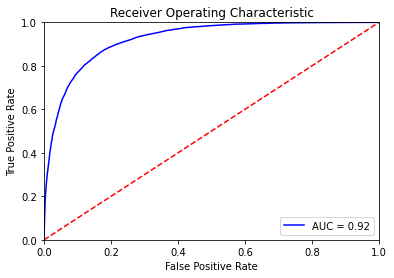

In [62]:
rf = RandomForestClassifier(n_estimators = 250, n_jobs=-1)

y_tr_cl = np.where(y_tr.astype(int)>=7, "positive", "negative")
y_ts_cl = np.where(y_ts.astype(int)>=7, "positive", "negative")

rf.fit(X_tr, y_tr_cl)

y_preds_tr = rf.predict(X_tr)
y_preds = rf.predict(X_ts)
y_preds_proba = rf.predict_proba(X_ts)[:,1]
test_roc = roc_auc_score(y_ts_cl, y_preds_proba)

# Desempeño en testing
print(classification_report(y_tr_cl, y_preds_tr))
# Desempeño en testing
print(classification_report(y_ts_cl, y_preds))
print(roc_auc_score(y_ts_cl, y_preds_proba))


# Gráfico de AUC
fpr, tpr, threshold = roc_curve([1 if e == "positive" else 0 for e in y_ts_cl], y_preds_proba)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % test_roc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()